#Oridnal Logistical Regression

In [ ]:
import pandas as pd
data = pd.read_excel('/content/test (2).xlsx')

data.columns


Index(['City (METRO)', 'Country', 'population ', 'city area',
       'population density', 'literacy rates', 'nitrogen fert. use',
       'average yearly precipitation*', 'number of vehicles',
       'mismanaged plastic waste per capita', 'tidal range',
       'city elevation difference (meters)', 'cars per cap',
       'MP concentration'],
      dtype='object')

#Random Forest


In [ ]:
#Importing all the libraries we need
import pandas as pd
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset using Pandas, and drop the unsused columns in the dataset
data = pd.read_excel('test (2).xlsx')
data["MP concentration"] = data["MP concentration"].str.strip()
data = data.drop(data.columns[[0, 1]], axis=1)

#Ordinally encoding our categorizations of our variables, GPT
category_mapping = {
    "very low": 0,
    "low": 1,
    "medium": 2,
    "high": 3,
    "very high": 4
}
data["MP_Concentration_Encoded"] = data["MP concentration"].map(category_mapping)

data['total_plastic_waste'] = data['mismanaged plastic waste per capita'] * data['population ']
data['runoff'] = data['average yearly precipitation*'] * data['city elevation difference (meters)']
#Trying to create different features to test out predcitions, using Pandas Documentation https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html

#Setting X and Y values
X = data[['population density', 'literacy rates',
       'nitrogen fert. use',
       'number of vehicles', 'mismanaged plastic waste per capita',
       'tidal range',
       'runoff']]
y = data["MP_Concentration_Encoded"]

# Split data into training and testing sets,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LeaveOneOut
loo = LeaveOneOut()
all_y_pred = []
all_y_true = []

# Perform Grid Search on training data
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

# Initialize the RandomForestClassifier without the pipeline
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid SearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)  # Fit only on training data
best_model = grid_search.best_estimator_

# LOOCV loop on training data to
for train_index, test_index in loo.split(X_train): # Split training data for LOOCV
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_val_fold)

    all_y_pred.extend(y_pred_fold)
    all_y_true.extend(y_val_fold)

# Evaluate the model using LOOCV on training data
print("Training Confusion Matrix:")
print(confusion_matrix(all_y_true, all_y_pred))
print("\nTraining Classification Report:")
print(classification_report(all_y_true, all_y_pred, zero_division=0))
print("\nTraining Accuracy Score:", accuracy_score(all_y_true, all_y_pred))


# ROC-AUC Calculation on the test set
y_probs_test = best_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_probs_test, multi_class='ovr')
print(f"\nROC-AUC Score (Test Set): {roc_auc}"
)
y_pred_test = best_model.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
# Print the confusion matrix
print("\nTest Set Confusion Matrix:")
print(cm_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the test set accuracy
print("\nTest Set Accuracy:", accuracy_test)
feature_scores = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Training Confusion Matrix:
[[ 0  0  4  0  0]
 [ 0  0  8  0  0]
 [ 2  1 27  3  0]
 [ 0  0  9  0  1]
 [ 0  0  1  1  2]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         8
           2       0.55      0.82      0.66        33
           3       0.00      0.00      0.00        10
           4       0.67      0.50      0.57         4

    accuracy                           0.49        59
   macro avg       0.24      0.26      0.25        59
weighted avg       0.35      0.49      0.41        59


Training Accuracy Score: 0.4915254237288136

ROC-AUC Score (Test Set): 0.8396613386613385

Test Set Confusion Matrix:
[[0 0 0 1 0]
 [0 1 2 0 0]
 [0 0 4 0 0]
 [0 0 3 2 0]
 [0 0 2 0 0]]

Test Set Accuracy: 0.4666666666666667


,0
population density,0.179801
nitrogen fert. use,0.177742
runoff,0.143427
tidal range,0.140292
number of vehicles,0.129739
mismanaged plastic waste per capita,0.124380
literacy rates,0.104618


Training Confusion Matrix:
[[ 0  0  4  0  0]
 [ 1  0  7  0  0]
 [ 2  1 25  4  1]
 [ 0  0  6  3  1]
 [ 0  0  2  0  2]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         8
           2       0.57      0.76      0.65        33
           3       0.43      0.30      0.35        10
           4       0.50      0.50      0.50         4

    accuracy                           0.51        59
   macro avg       0.30      0.31      0.30        59
weighted avg       0.42      0.51      0.46        59


Training Accuracy Score: 0.5084745762711864

ROC-AUC Score (Test Set): 0.9226133866133865

Test Set Confusion Matrix:
[[0 0 1 0 0]
 [0 2 1 0 0]
 [0 0 4 0 0]
 [0 0 3 2 0]
 [1 0 1 0 0]]

Test Set Accuracy: 0.5333333333333333


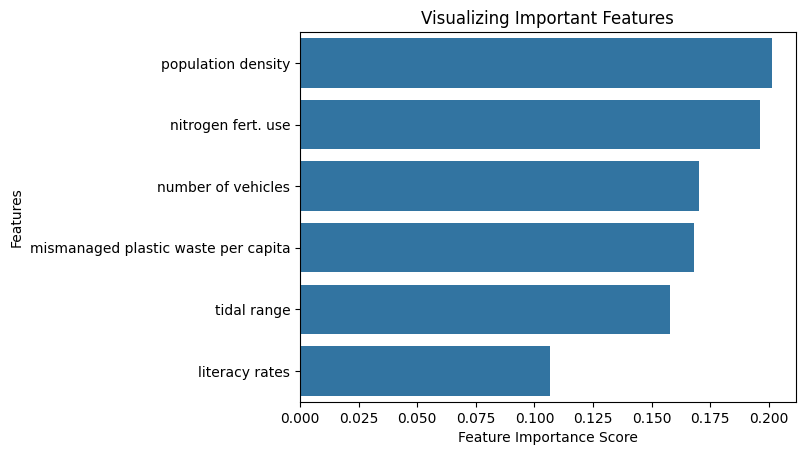

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
#Loading the dataset using Pandas, and drop the unsused columns in the dataset
data = pd.read_excel('test (2).xlsx')
data["MP concentration"] = data["MP concentration"].str.strip()
data = data.drop(data.columns[[0, 1]], axis=1)

#Ordinally encoding our categorizations of our variables and then mapping them to a new column, GPT
category_mapping = {
    "very low": 0,
    "low": 1,
    "medium": 2,
    "high": 3,
    "very high": 4
}
data["MP_Concentration_Encoded"] = data["MP concentration"].map(category_mapping)

data['total_plastic_waste'] = data['mismanaged plastic waste per capita'] * data['population ']
data['runoff'] = data['average yearly precipitation*'] * data['city elevation difference (meters)']
#Trying to create different features to test out predcitions, using Pandas Documentation https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html

# Setting X and Y values
X = data[['population density', 'literacy rates',
       'nitrogen fert. use',
       'number of vehicles', 'mismanaged plastic waste per capita',
       'tidal range']] #Try different group of parameters to get most accurate value
y = data["MP_Concentration_Encoded"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LeaveOneOut for final evaluation - Professor
loo = LeaveOneOut()

# Perform Grid Search with reduced k-fold cross-validation for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid SearchCV with reduced k-fold, Find best hyper parameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=KFold(n_splits=4), scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# LOOCV loop for final evaluation
all_y_pred = []
all_y_true = []
for train_index, test_index in loo.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_val_fold)

    all_y_pred.extend(y_pred_fold)
    all_y_true.extend(y_val_fold)

# Evaluate the model using LOOCV on training data, https://gist.github.com/pb111/88545fa33780928694388779af23bf58
print("Training Confusion Matrix:")
print(confusion_matrix(all_y_true, all_y_pred))
print("\nTraining Classification Report:")
print(classification_report(all_y_true, all_y_pred, zero_division=0))
print("\nTraining Accuracy Score:", accuracy_score(all_y_true, all_y_pred))

# ROC-AUC Calculation on the test set, https://semaphoreci.com/blog/imbalanced-data-machine-learning-python and Gemini
y_probs_test = best_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_probs_test, multi_class='ovr')
print(f"\nROC-AUC Score (Test Set): {roc_auc}")


# Print the confusion matrix
y_pred_test = best_model.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print("\nTest Set Confusion Matrix:")
print(cm_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the test set accuracy
print("\nTest Set Accuracy:", accuracy_test)

# Feature Importance
feature_scores = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph

plt.show()
#https://gist.github.com/pb111/88545fa33780928694388779af23bf58 - all evaluation metrics except ROC-AUC

#SVM


In [ ]:
data.columns

Index(['population ', 'city area', 'population density', 'literacy rates',
       'nitrogen fert. use', 'average yearly precipitation*',
       'number of vehicles', 'mismanaged plastic waste per capita',
       'tidal range', 'city elevation difference (meters)', 'Latitude',
       'Longitude', 'cars per cap', 'MP concentration'],
      dtype='object')

In [ ]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef

# Load the data
data = pd.read_excel('test (2).xlsx')
data = data.drop(data.columns[[0, 1]], axis=1)  # Remove first two columns
data["MP concentration"] = data["MP concentration"].str.strip() #strip unneccessary spaces
X = data.iloc[:, :-1]
y = data["MP concentration"]
#defining x and y

# Split the data, similar as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using ONLY the training data, https://gist.github.com/pb111/ca4680d8960c46aeb1b824a93a079fa7
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #applying the scaling to the testing data as well

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Training model with GridSearchCV
model = SVC(class_weight='balanced')
grid_search = GridSearchCV(model, param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_train, y_train)


# Getting and evaluating best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(best_model)
print('Training set score: {:.4f}'.format(best_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(best_model.score(X_test, y_test)))


# ROC-AUC
y_probs_test = best_model.decision_function(X_test)  # Use decision_function for SVM
roc_auc = roc_auc_score(y_test, y_probs_test, multi_class='ovr')

# Matthews Correlation Coefficient, Gemini
mcc = matthews_corrcoef(y_test, y_pred)

print("ROC-AUC:", roc_auc)
print("MCC:", mcc)
if best_model.kernel == 'linear': #https://www.geeksforgeeks.org/determining-feature-importance-in-svm-classifiers-with-scikit-learn/
       feature_coefficients= best_model.coef_
       for i, coeff in enumerate(feature_coefficients):
        print(f"Feature {data.columns[i]}: {coeff}")


Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

        high       0.80      0.80      0.80         5
         low       0.67      0.67      0.67         3
      medium       0.50      0.75      0.60         4
   very high       1.00      0.50      0.67         2
    very low       0.00      0.00      0.00         1

    accuracy                           0.67        15
   macro avg       0.59      0.54      0.55        15
weighted avg       0.67      0.67      0.65        15


Confusion Matrix:
 [[4 1 0 0 0]
 [0 2 1 0 0]
 [1 0 3 0 0]
 [0 0 1 1 0]
 [0 0 1 0 0]]
SVC(C=10, class_weight='balanced', kernel='linear')
Training set score: 0.7458
Test set score: 0.6667


ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.inspection import permutation_importance # Import for permutation importance

# Load the data
data = pd.read_excel('test (2).xlsx')
data = data.drop(data.columns[[0, 1]], axis=1)  # Remove first two columns
data["MP concentration"] = data["MP concentration"].str.strip()  # Strip unnecessary spaces
X = data.iloc[:, :-1]  # Features
y = data["MP concentration"]  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Train and tune the model
model = SVC(class_weight='balanced')
grid_search = GridSearchCV(model, param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(best_model)
print('Training set score: {:.4f}'.format(best_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(best_model.score(X_test, y_test)))

# ROC-AUC (assuming y_probs_test is defined somewhere before) - Needs to be fixed if needed
#roc_auc = roc_auc_score(y_test, y_probs_test, multi_class='ovr') #Fix this later, or disregard

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)

#print("ROC-AUC:", roc_auc) #Fix this later, or disregard
print("MCC:", mcc)

# --- Permutation Importance ---
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
feature_names = X.columns

print("\nFeature Importances (Permutation Importance):")
for i, importance in enumerate(importances):
    print(f"Feature {feature_names[i]}: {importance}")


Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

        high       0.80      0.80      0.80         5
         low       0.67      0.67      0.67         3
      medium       0.50      0.75      0.60         4
   very high       1.00      0.50      0.67         2
    very low       0.00      0.00      0.00         1

    accuracy                           0.67        15
   macro avg       0.59      0.54      0.55        15
weighted avg       0.67      0.67      0.65        15


Confusion Matrix:
 [[4 1 0 0 0]
 [0 2 1 0 0]
 [1 0 3 0 0]
 [0 0 1 1 0]
 [0 0 1 0 0]]
SVC(C=10, class_weight='balanced', kernel='linear')
Training set score: 0.7458
Test set score: 0.6667
MCC: 0.5562342005550127

Feature Importances (Permutation Importance):
Feature population : 0.17999999999999997
Feature city area: 0.059999999999999984
Feature population density: 0.2333333333333333


In [ ]:
data.columns

Index(['population ', 'city area', 'population density', 'literacy rates',
       'nitrogen fert. use', 'average yearly precipitation*',
       'number of vehicles', 'mismanaged plastic waste per capita',
       'tidal range', 'city elevation difference (meters)', 'cars per cap',
       'MP concentration'],
      dtype='object')

#Boosting

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Load the data
data = pd.read_excel('/content/test (2).xlsx')
data["MP concentration"] = data["MP concentration"].str.strip()
data = data.drop(data.columns[[0, 1]], axis=1)

# Encode target variable
category_mapping = {
    "very low": 0,
    "low": 1,
    "medium": 2,
    "high": 3,
    "very high": 4
}
data["MP_Concentration_Encoded"] = data["MP concentration"].map(category_mapping)

# Predictors and target variable
X = data[[ 'population density', 'literacy rates',
       'nitrogen fert. use', 'average yearly precipitation*',
        'mismanaged plastic waste per capita',
       'tidal range'
]]
y = data["MP_Concentration_Encoded"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize LeaveOneOut cross-validation
loo = LeaveOneOut()

# Lists to store predictions and true labels for all folds
all_y_pred = []
all_y_true = []

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # For multi-class classification
    num_class=5,               # Number of target classes
    eval_metric='mlogloss',    # Multi-class logarithmic loss
    learning_rate=0.1,         # Learning rate
    n_estimators=100,          # Number of boosting rounds
    max_depth=3,               # Max depth of each tree
    random_state=42
)


# Perform LOOCV
for train_index, test_index in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training data
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = xgb_model.predict(X_test)

    # Store predictions and true labels
    all_y_pred.extend(y_pred)
    all_y_true.extend(y_test)

# Evaluate the model using predictions and true labels from all folds
print("\nConfusion Matrix:\n", confusion_matrix(all_y_true, all_y_pred))
print("\nClassification Report:\n", classification_report(all_y_true, all_y_pred, zero_division=0))
print("\nAccuracy:", accuracy_score(all_y_true, all_y_pred))


Confusion Matrix:
 [[ 0  0  2  2  1]
 [ 1  3  6  1  0]
 [ 1  6 23  7  0]
 [ 1  0  6  5  3]
 [ 1  0  3  1  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.27      0.30        11
           2       0.57      0.62      0.60        37
           3       0.31      0.33      0.32        15
           4       0.20      0.17      0.18         6

    accuracy                           0.43        74
   macro avg       0.28      0.28      0.28        74
weighted avg       0.42      0.43      0.42        74


Accuracy: 0.43243243243243246
